In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib.patches as patches
import qutip as qt
from tqdm import tqdm

In [2]:
def power_to_kappa(power, kappa=0.1):
    power2 = np.array(power)
    power2 -= 49.6 # splitters and attenuation
    power2 = np.sqrt(10**((power2)/10)*0.001*50) # power to RMS voltage
    power2 *= 2*np.sqrt(2) # RMS to p2p voltage
    power2 *= (84.34 + 73.44) # polariton rabi rates in MHz
    power2 /= kappa
    return power2

# Frequency Dependence and Polariton Splitting

## Data

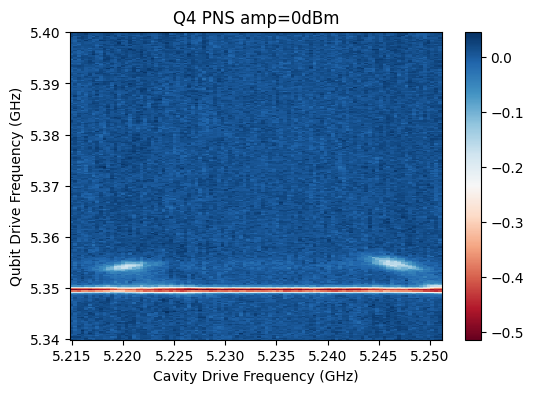

In [3]:
df = pd.read_csv(f'..\\experiment_data\\bus-Q4-pns_53.csv')
bfreqs = np.array(np.unique(df['frequency']))
qfreqs = np.array(np.unique(df['frequency.1']))
phase = np.unwrap(np.array(df['phase']).reshape([len(bfreqs), len(qfreqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(bfreqs/1e9, qfreqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS amp=0dBm')
plt.xlabel('Cavity Drive Frequency (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

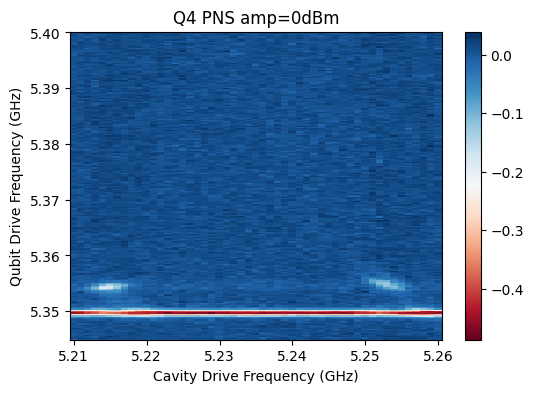

In [4]:
df = pd.read_csv(f'..\\experiment_data\\bus-Q4-pns_58.csv')
bfreqs = np.array(np.unique(df['frequency']))
qfreqs = np.array(np.unique(df['frequency.1']))
phase = np.unwrap(np.array(df['phase']).reshape([len(bfreqs), len(qfreqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(bfreqs/1e9, qfreqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS amp=0dBm')
plt.xlabel('Cavity Drive Frequency (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

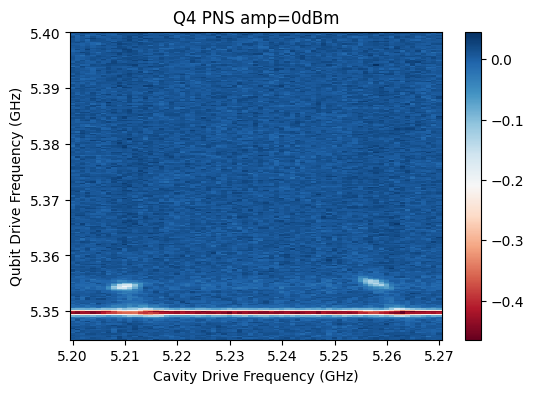

In [5]:
df = pd.read_csv(f'..\\experiment_data\\bus-Q4-pns_65.csv')
bfreqs = np.array(np.unique(df['frequency']))
qfreqs = np.array(np.unique(df['frequency.1']))
phase = np.unwrap(np.array(df['phase']).reshape([len(bfreqs), len(qfreqs)]))
phase = phase.transpose()
phase = phase - np.mean(phase, axis=0)
plt.figure(figsize=(6,4))
plt.pcolor(bfreqs/1e9, qfreqs/1e9, phase, cmap='RdBu')
plt.colorbar()
plt.title(f'Q4 PNS amp=0dBm')
plt.xlabel('Cavity Drive Frequency (GHz)')
plt.ylabel('Qubit Drive Frequency (GHz)')
plt.show()

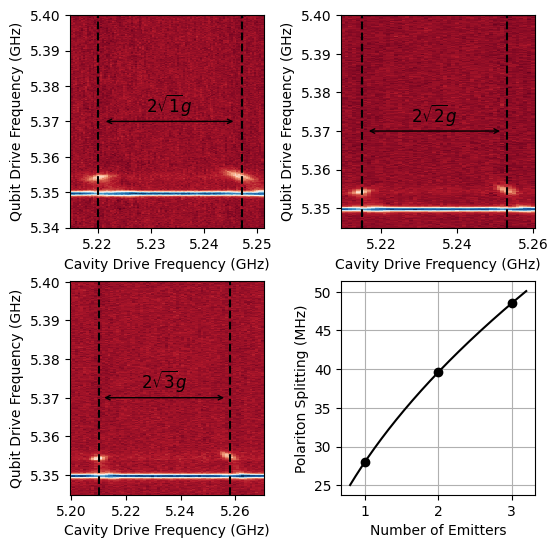

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(6,6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.25)
idxs = np.array([53, 58, 65])
for i, idx in enumerate(idxs):
    df = pd.read_csv(f'..\\experiment_data\\bus-Q4-pns_{idx}.csv')
    bfreqs = np.array(np.unique(df['frequency']))
    qfreqs = np.array(np.unique(df['frequency.1']))
    phase = np.unwrap(np.array(df['phase']).reshape([len(bfreqs), len(qfreqs)]))
    phase = phase.transpose()
    phase = phase - np.mean(phase, axis=0)
    ax[int(np.floor(i/2)), i % 2].pcolor(bfreqs/1e9, qfreqs/1e9, -phase, cmap='RdBu')
    ax[int(np.floor(i/2)), i % 2].set_xlabel('Cavity Drive Frequency (GHz)')
    ax[int(np.floor(i/2)), i % 2].tick_params(labelsize=10)
    ax[int(np.floor(i/2)), i % 2].set_ylabel('Qubit Drive Frequency (GHz)')
ax[0,0].axvline(5.22, linestyle='dashed', color='k')
ax[0,0].axvline(5.247, linestyle='dashed', color='k')
p1 = patches.FancyArrowPatch((5.221, 5.37), (5.246, 5.37), arrowstyle='<->', mutation_scale=8)
ax[0,0].annotate("$2\sqrt{1}g$", xy=(0.5*(5.221+5.246), 5.371), ha='center', va='bottom', fontsize=12)
ax[0,0].add_patch(p1)
ax[0,1].axvline(5.215, linestyle='dashed', color='k')
ax[0,1].axvline(5.253, linestyle='dashed', color='k')
p1 = patches.FancyArrowPatch((5.216, 5.37), (5.252, 5.37), arrowstyle='<->', mutation_scale=8)
ax[0,1].annotate("$2\sqrt{2}g$", xy=(0.5*(5.216+5.252), 5.371), ha='center', va='bottom', fontsize=12)
ax[0,1].add_patch(p1)
ax[1,0].axvline(5.210, linestyle='dashed', color='k')
ax[1,0].axvline(5.258, linestyle='dashed', color='k')
p1 = patches.FancyArrowPatch((5.211, 5.37), (5.257, 5.37), arrowstyle='<->', mutation_scale=8)
ax[1,0].annotate("$2\sqrt{3}g$", xy=(0.5*(5.211+5.257), 5.371), ha='center', va='bottom', fontsize=12)
ax[1,0].add_patch(p1)
ns = np.arange(1,4)
ax[1,1].plot(ns, 2*np.sqrt(ns)*14, 'o', color='k')
nss = np.linspace(0.8, 3.2, 1001)
ax[1,1].plot(nss, 2*np.sqrt(nss)*14, '-', color='k')
ax[1,1].set_ylabel('Polariton Splitting (MHz)')
ax[1,1].set_xlabel('Number of Emitters')
ax[1,1].tick_params(labelsize=10)
ax[1,1].grid()
plt.show()

In [14]:
int(np.floor(3/2))

1